In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import mesa_reader as ms
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import cycle
from astropy import units as u
from astropy.units import cds
import glob

Msol_to_MJup = (cds.Msun.to('kg')/cds.Mjup.to('kg'))
MEarth_to_MJup = (cds.Mgeo.to('kg')/cds.Mjup.to('kg'))

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# #First we'll plot the HJs all with Mcore = 10 MEarth.
cur_initial_mass = [3.*cds.Mjup]
#Then variable cores
core_masses = [10.*cds.Mgeo]

['./MESA/RLO_calculations/Mpinit_3.00_MJup_10.00_ME_20_Myr_old_qs6_del1-gam0p5']


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in divide


(2.7, 2.75)

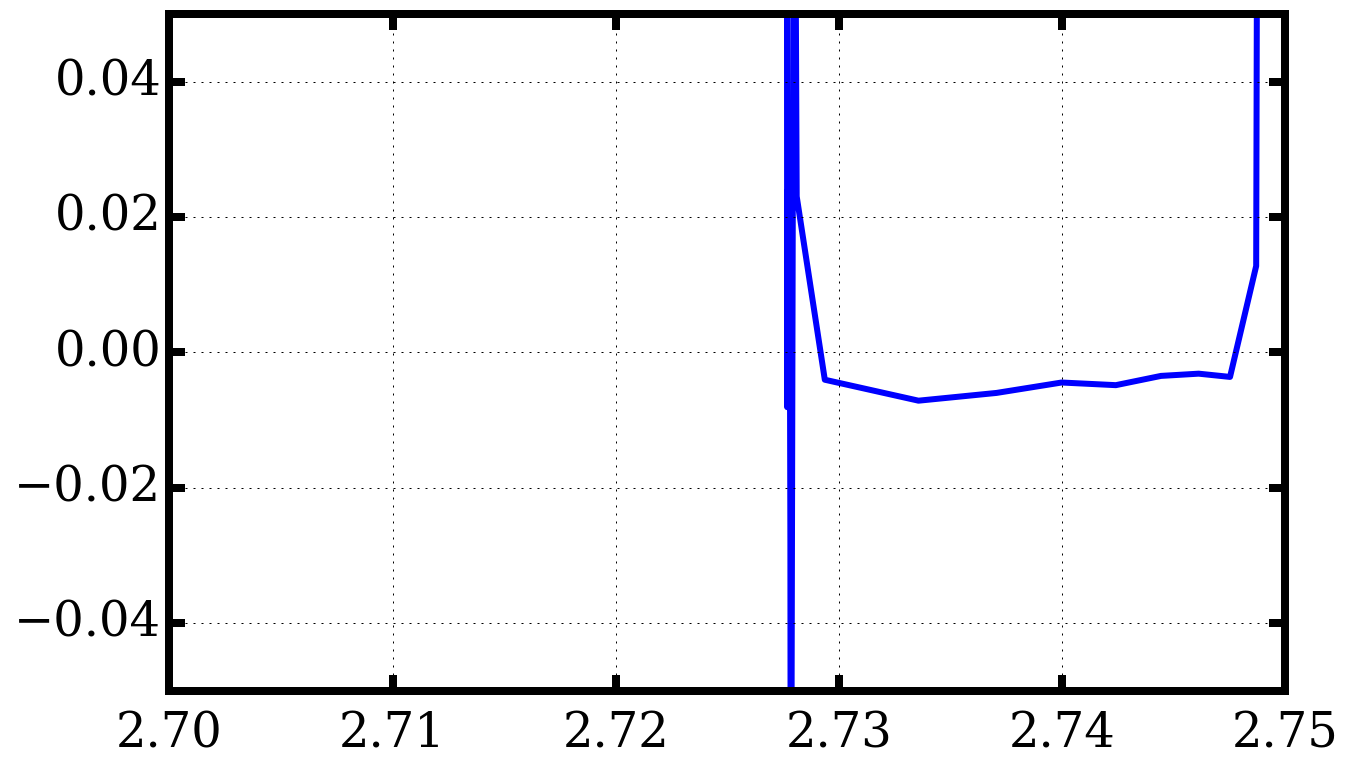

In [36]:
qs = 6

fig = plt.figure(figsize=(10,10*4./3))
ax1 = fig.add_subplot(211)

directory = (glob.glob('./MESA/RLO_calculations/Mpinit_%.1f*10.00_ME*20_Myr_old_qs%i_del1-gam0p5' % 
                       (cur_initial_mass.value, qs)))
print(directory)
hst = ms.MesaData(file_name=directory[0] + '/binary_history.data')

#Calculate radius and mass derivatives
time = hst.data('age')
radius = hst.data('star_1_radius')
mass = hst.data('star_1_mass')*Msol_to_MJup
dlnradius = np.gradient(radius)/radius
dlnmass = np.gradient(mass)/mass

plt.plot(mass, dlnradius/dlnmass)
#plt.semilogx(time, radius)
plt.ylim([-0.05, 0.05])
plt.xlim([2.7, 2.75])